#**CIENCIA Y ANALÍTICA DE DATOS - MIGUEL MARINES**
##**<u>Ingeniería de Características (FE)</u>**
---
---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Ciencia_Analitica_Datos"
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
cars_df.shape

(426880, 26)

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [8]:
cars_df.drop(columns=["id", "VIN", "url", "image_url", "description", "posting_date"], inplace=True, axis=1)

In [9]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
 18  lat 

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [10]:
total_rows,total_columns  = cars_df.shape

In [11]:
total_rows

426880

In [12]:
total_columns

20

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [13]:
cars_df.isna().mean() * 100

region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
dtype: float64

In [14]:
perc = 30.0
min_count =  int(((100-perc)/100)* len(cars_df))
cars_df.dropna(axis=1, thresh=min_count, inplace=True)

In [15]:
cars_df.isna().mean() * 100

region           0.000000
region_url       0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
type            21.752717
state            0.000000
lat              1.534155
long             1.534155
dtype: float64

In [16]:
print(f'total de columnas anteriormente {total_columns}')
print(f'total de columnas eliminadas {total_columns - len(cars_df.columns.tolist())}')
print(f'total de columnas ahora {len(cars_df.columns.tolist())}')

total de columnas anteriormente 20
total de columnas eliminadas 6
total de columnas ahora 14


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


In [17]:
cars_df.dropna(subset=['year','manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'lat', 'long'], inplace=True)

In [18]:
cars_df.isna().mean() * 100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.485623
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

In [19]:
print(f'total de filas previamente {total_rows}')
porcentaje = (len(cars_df)/total_rows) * 100;
print(f'porcentaje de filas eliminadas {100-porcentaje}%')
print(f'total de filas ahora {len(cars_df)}')

total de filas previamente 426880
porcentaje de filas eliminadas 10.164683283358329%
total de filas ahora 383489


2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [20]:
cars_df.isna().mean() * 100

region           0.000000
region_url       0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
type            21.485623
state            0.000000
lat              0.000000
long             0.000000
dtype: float64

In [21]:
cars_df['type'].fillna(cars_df['type'].mode().iloc[0],inplace=True)

In [22]:
cars_df.isna().mean() * 100

region          0.0
region_url      0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
state           0.0
lat             0.0
long            0.0
dtype: float64

## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

<ipython-input-23-22dc4a3f565a>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i)


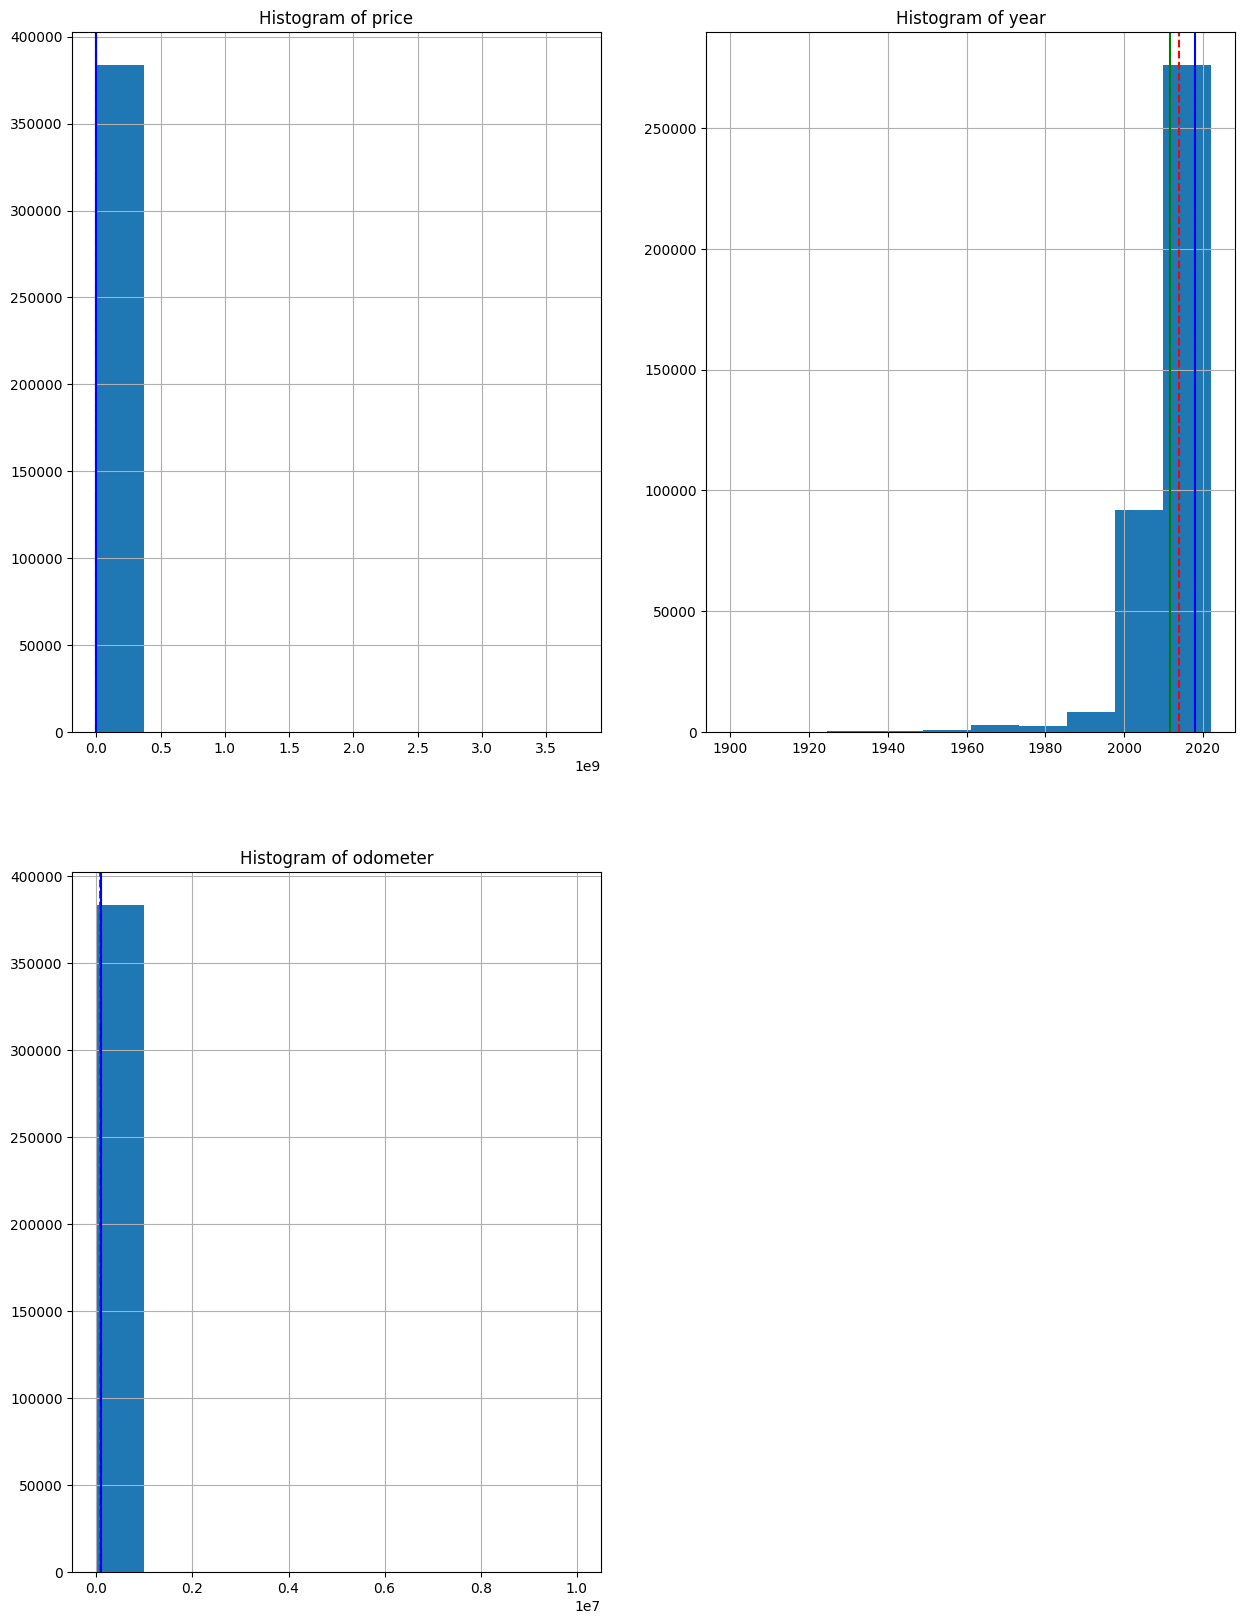

In [23]:
plt.figure(figsize=(15,20))
set_columns=['price', 'year', 'odometer']
cars_df['price'].hist()
for i, col in enumerate(set_columns, 1):
    media = cars_df[col].mean()
    median = cars_df[col].median()
    mode = cars_df[col].mode().iloc[0]
    plt.subplot(2,2,i)
    cars_df[col].hist()
    plt.axvline(x=media, linestyle='-', color='green')
    plt.axvline(x=median, linestyle='--', color='red')
    plt.axvline(x=mode, linestyle='-', color='blue')
    plt.title(f'Histogram of {col}')
#    sns.histplot(data=cars_df, x='price', kde=True)

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [24]:
from datetime import datetime
date_now = datetime.now()
date_now.year
cars_df['age'] = date_now.year - np.int64(cars_df['year'])
cars_df.drop(columns=['year'], inplace=True)
cars_df

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,lat,long,age
27,auburn,https://auburn.craigslist.org,33590,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,al,32.590000,-85.480000,10
28,auburn,https://auburn.craigslist.org,22590,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,al,32.590000,-85.480000,14
29,auburn,https://auburn.craigslist.org,39590,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,al,32.590000,-85.480000,4
30,auburn,https://auburn.craigslist.org,30990,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,al,32.590000,-85.480000,7
31,auburn,https://auburn.craigslist.org,15000,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,al,32.592000,-85.518900,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,33.786500,-84.445400,5
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,33.786500,-84.445400,4
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,33.779214,-84.411811,4
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,33.786500,-84.445400,6


<Axes: xlabel='age', ylabel='Count'>

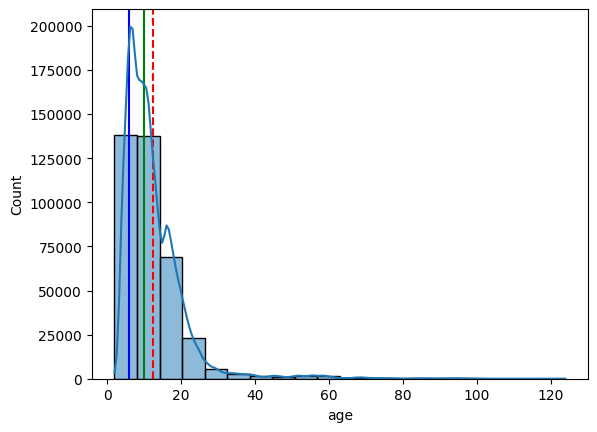

In [25]:
media = cars_df['age'].mean()
median = cars_df['age'].median()
mode = cars_df['age'].mode().iloc[0]
plt.axvline(x=media, linestyle='--', color='red')
plt.axvline(x=median, linestyle='-', color='green')
plt.axvline(x=mode, linestyle='-', color='blue')
sns.histplot(data=cars_df, x='age', kde=True, bins=20)

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

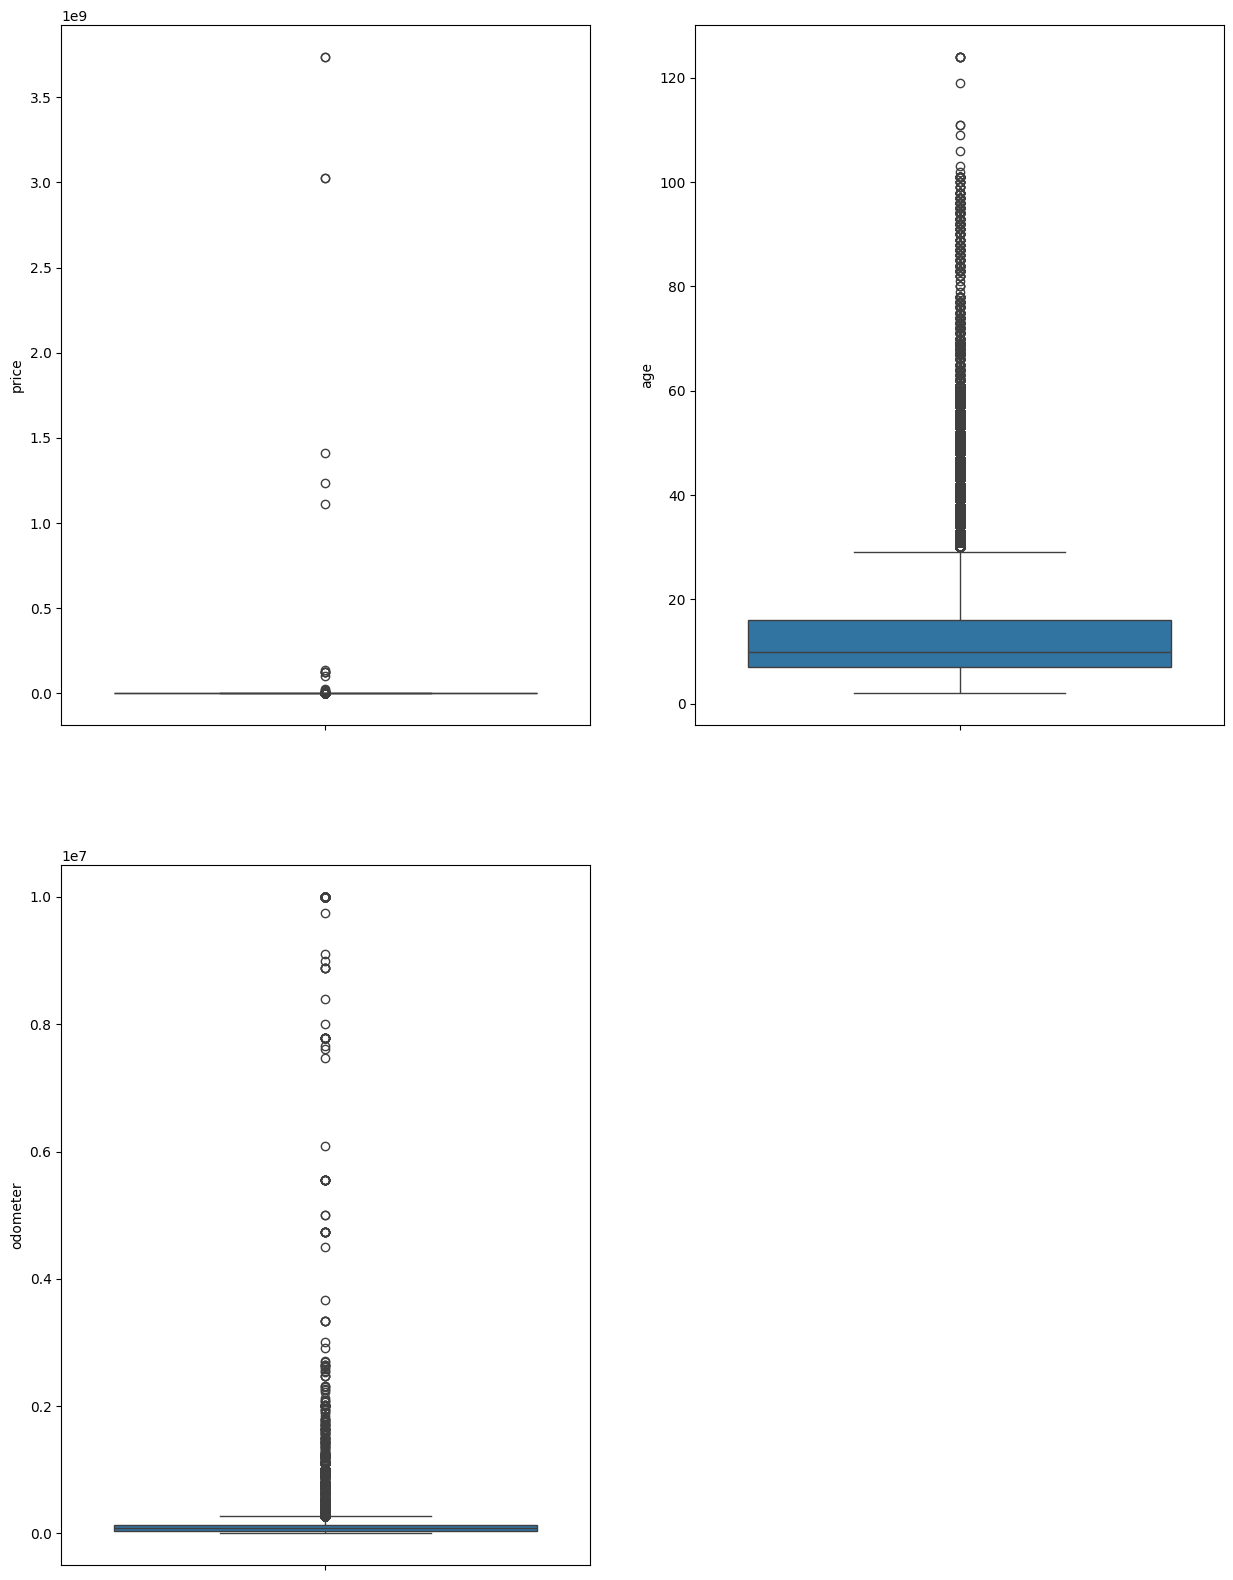

In [26]:
plt.figure(figsize=(15,20))
for i, col in enumerate(['price', 'age', 'odometer'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=cars_df, y=col)

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

In [27]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,383489.0,64788.029239,1.153956e+07,0.000000,5999.000000,13998.000000,26888.000000,3.736929e+09
odometer,383489.0,96623.146998,1.927812e+05,0.000000,38000.000000,85986.000000,134000.000000,1.000000e+07
lat,383489.0,38.524927,5.827518e+00,-81.838232,34.720000,39.170000,42.430800,8.225283e+01
long,383489.0,-94.589720,1.830038e+01,-159.827728,-111.841594,-88.323538,-80.824614,1.738855e+02
age,383489.0,12.431924,8.682616e+00,2.000000,7.000000,10.000000,16.000000,1.240000e+02


4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [28]:
def quantile_outliers(df, col):
    quantile_25 = df[col].quantile(0.25)
    quantile_75 = df[col].quantile(0.75)
    iqr = quantile_75 - quantile_25
    upper_limit = quantile_75 + 1.5 * iqr
    lower_limit = quantile_25 - 1.5 * iqr
    print(f'*************** {col} ***************')
    print(f'upper limit {upper_limit}')
    print(f'lower limit {lower_limit}')
    total_rows = len(cars_df)
    total_upper_limit = cars_df[cars_df[col] > upper_limit]
    total_lower_limit = cars_df[cars_df[col] < lower_limit]
    print(f'total upper outliers {len(total_upper_limit)}')
    print(f'total lower outliers {len(total_lower_limit)}')
    totalOfOutliers = len(total_upper_limit) + len(total_lower_limit)
    print(f'total outliers {totalOfOutliers}')
    percentageOfOutliers = (totalOfOutliers / len(cars_df)) * 100
    print(f'porcentage of outliers {percentageOfOutliers}')
    outliers_df = cars_df[(cars_df[col] < lower_limit) | (cars_df[col] > upper_limit)]
    # removing outliers
    cars_df.drop(index=outliers_df.index, inplace=True)

quantile_outliers(cars_df, 'price')
quantile_outliers(cars_df, 'age')
quantile_outliers(cars_df,'odometer')

*************** price ***************
upper limit 58221.5
lower limit -25334.5
total upper outliers 6285
total lower outliers 0
total outliers 6285
porcentage of outliers 1.6388996816075556
*************** age ***************
upper limit 29.5
lower limit -6.5
total upper outliers 11732
total lower outliers 0
total outliers 11732
porcentage of outliers 3.110253337716461
*************** odometer ***************
upper limit 278575.5
lower limit -104292.5
total upper outliers 2695
total lower outliers 0
total outliers 2695
porcentage of outliers 0.7374025917170126


In [29]:
print(f'total de filas previamente {total_rows}')
porcentaje = (len(cars_df) * 100 / total_rows);
print(f'porcentaje de filias eliminadas {100.0 - porcentaje}%')
print(f'total de filas ahora {len(cars_df)}')

total de filas previamente 426880
porcentaje de filias eliminadas 15.016632308845573%
total de filas ahora 362777


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

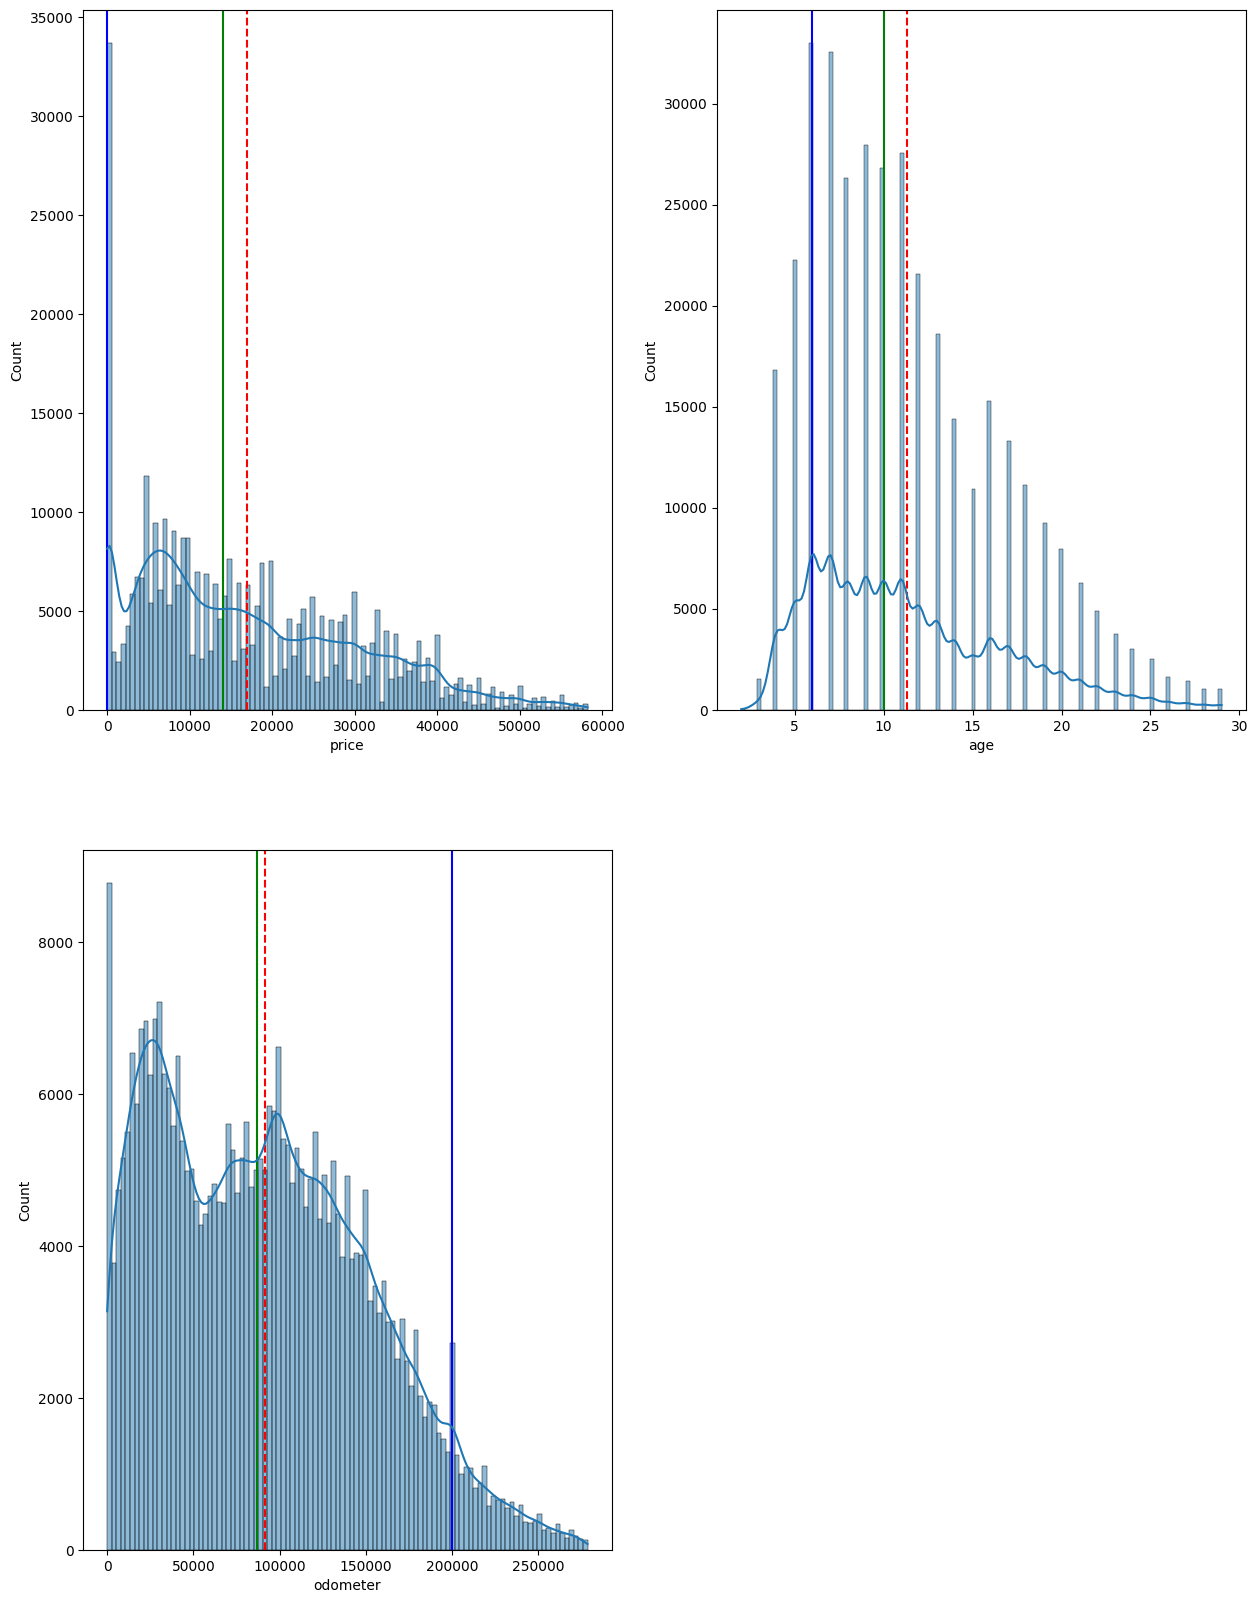

In [30]:
plt.figure(figsize=(15,20))
for i, col in enumerate(['price', 'age', 'odometer'], 1):
    media = cars_df[col].mean()
    median = cars_df[col].median()
    mode = cars_df[col].mode().iloc[0]
    plt.subplot(2,2,i)
    plt.axvline(x=media, linestyle='--', color='red')
    plt.axvline(x=median, linestyle='-', color='green')
    plt.axvline(x=mode, linestyle='-', color='blue')
    sns.histplot(data=cars_df, x=col, kde=True)

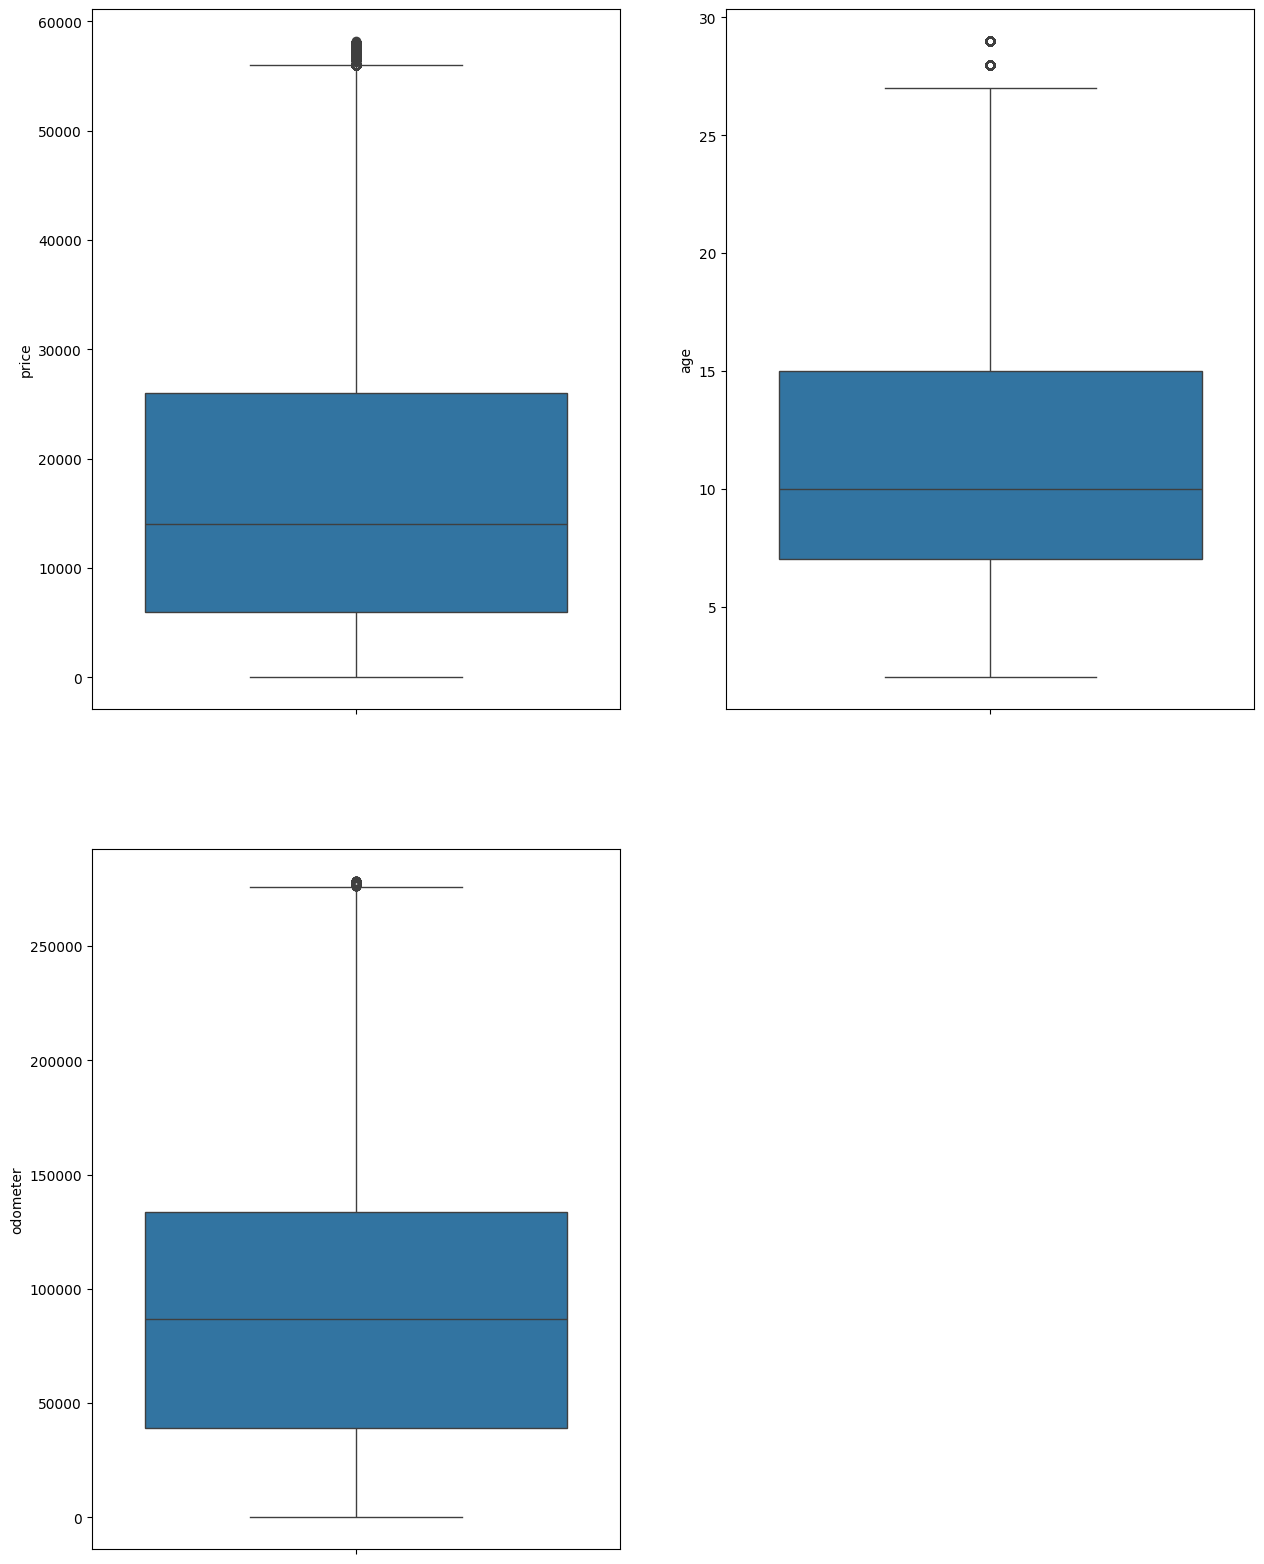

In [31]:
plt.figure(figsize=(15,20))
for i, col in enumerate(['price', 'age', 'odometer'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=cars_df, y=col)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [32]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

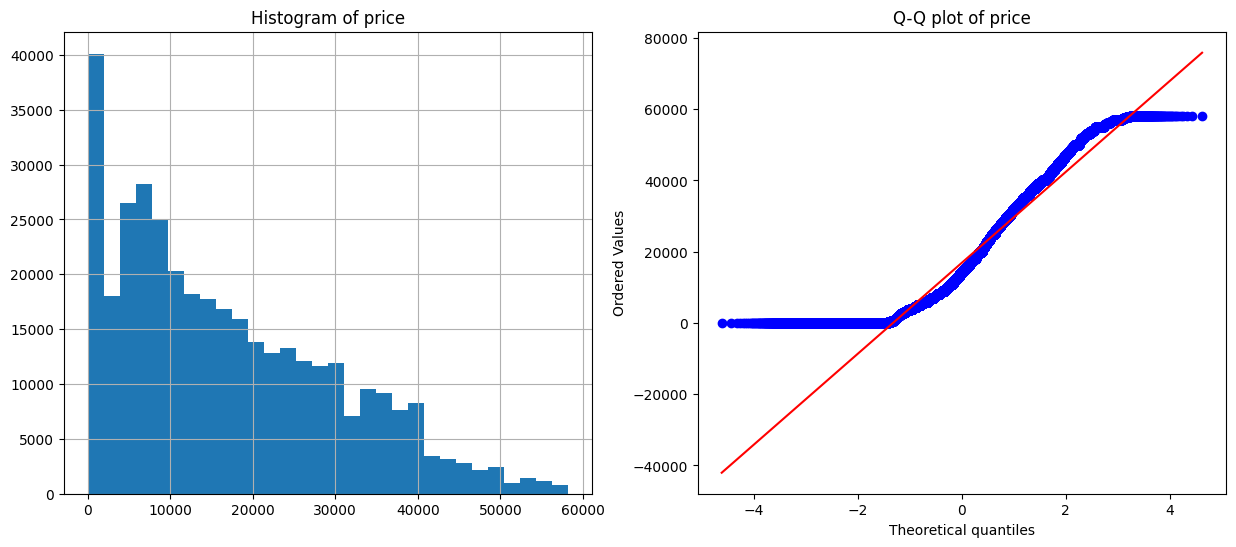

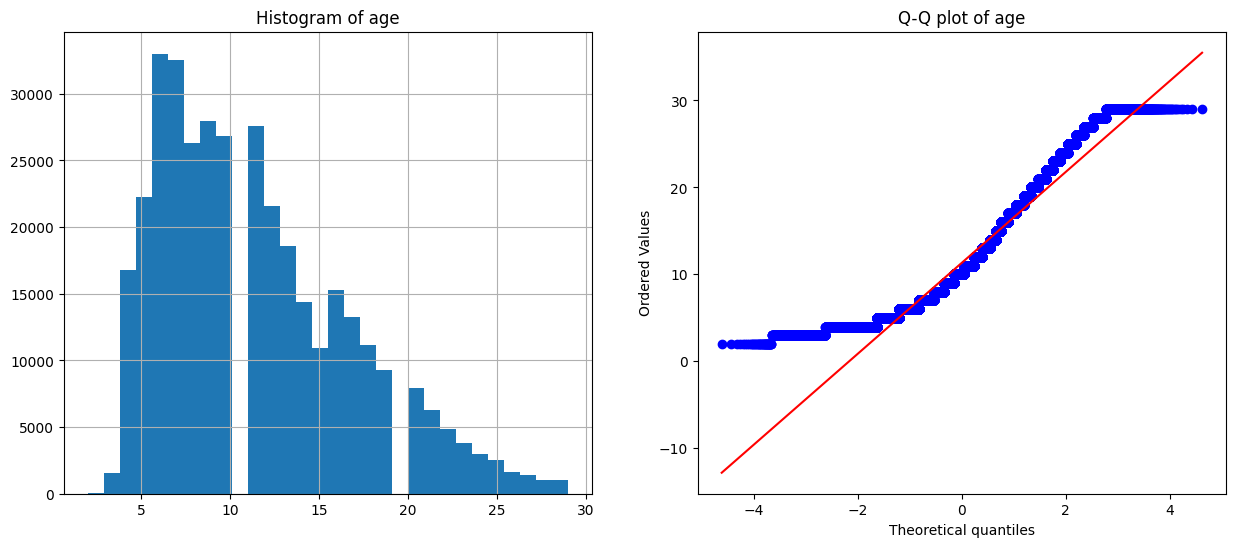

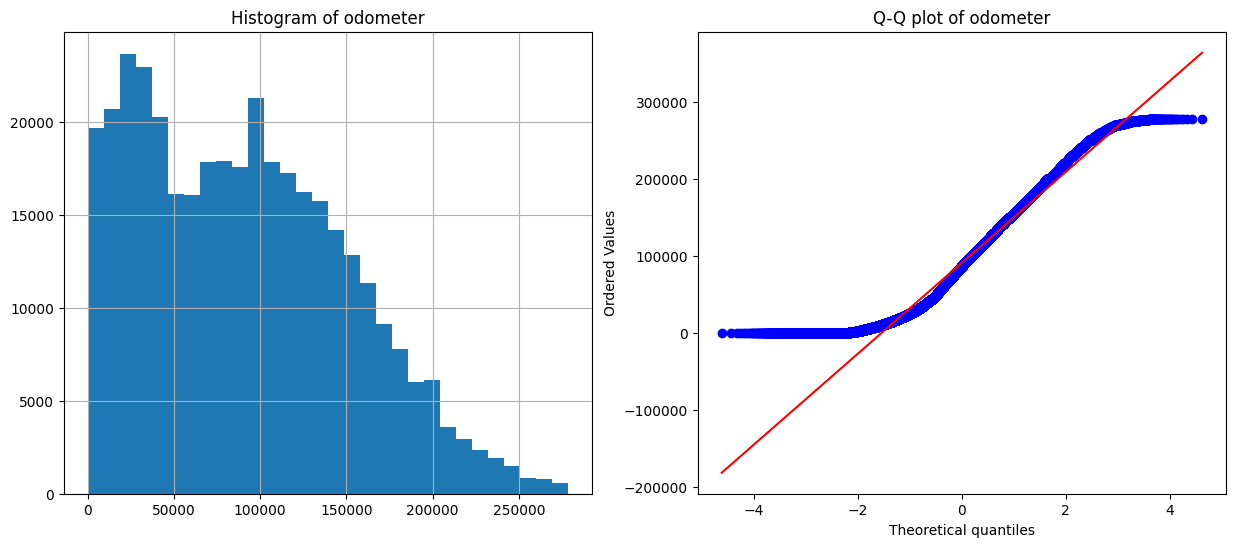

In [33]:
for i in ['price', 'age', 'odometer']:
    diagnostic_plots(cars_df, i)

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [34]:
from sklearn.preprocessing import PowerTransformer

def transformYeoJohnson(df, columns):
    transformer = PowerTransformer(method="yeo-johnson", standardize=False)
    transf = transformer.fit_transform(df[columns])
    return pd.DataFrame(transf, columns=transformer.get_feature_names_out())


In [35]:
trans_df = transformYeoJohnson(cars_df, ['price', 'odometer', 'age'])
trans_df

,price,odometer,age
0,200.648218,629.785377,2.402288
1,168.918413,702.965871,2.713654
2,215.457009,349.514589,1.611416
3,193.761084,524.901169,2.082745
4,141.362733,959.812276,2.489625
...,...,...,...
362772,172.126351,461.031291,1.794212
362773,192.672583,272.674665,1.611416
362774,204.230823,154.786328,1.611416
362775,188.235191,444.677381,1.948803


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

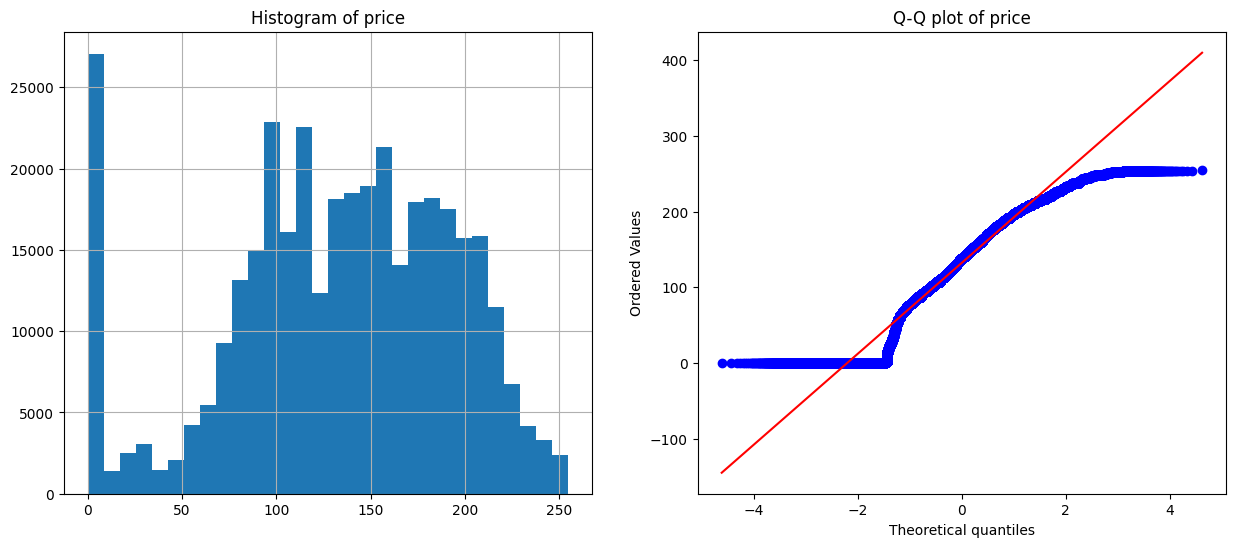

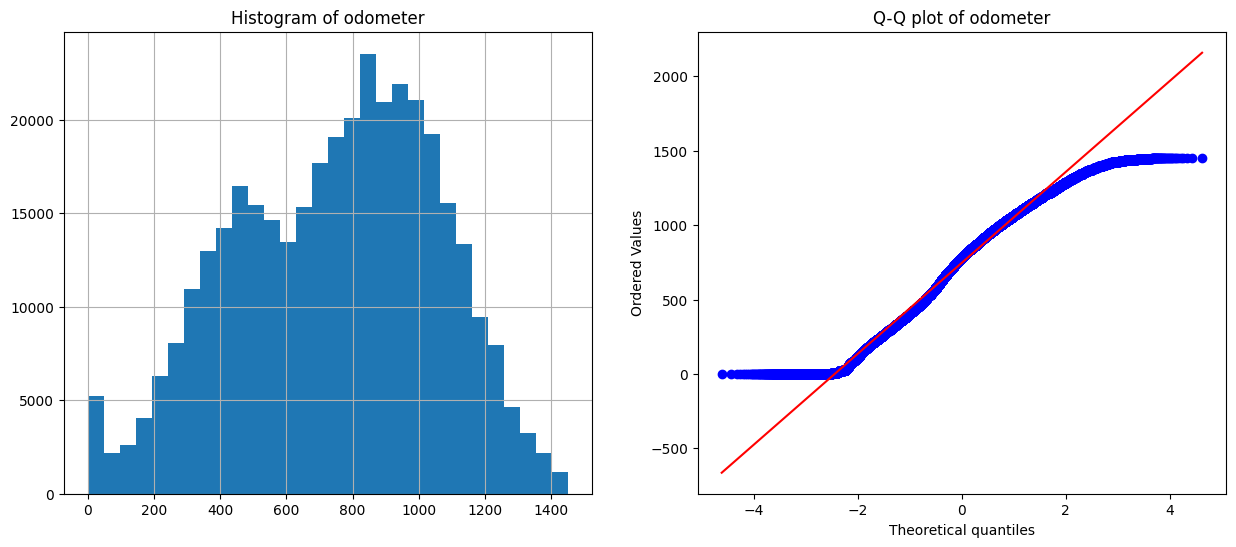

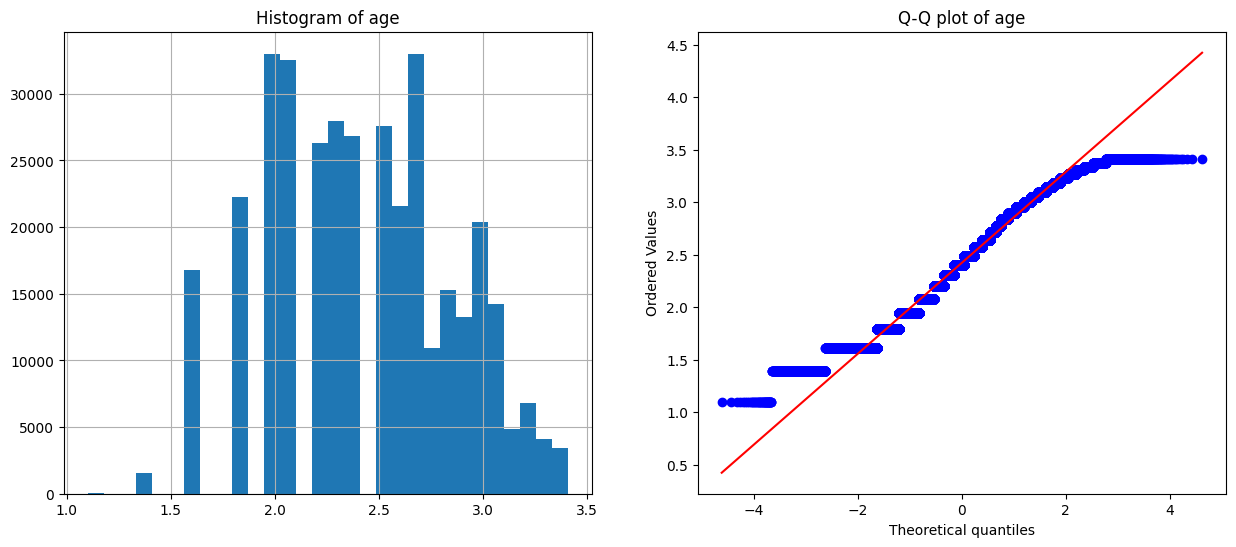

In [36]:
for i in ['price', 'odometer', 'age']:
    diagnostic_plots(trans_df, i)

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [37]:
from sklearn.preprocessing import MinMaxScaler

def minmax(df):
    scaler = MinMaxScaler()
    minmax = scaler.fit_transform(df)
    return pd.DataFrame(minmax, columns=scaler.get_feature_names_out())

In [38]:
minmax_df = minmax(trans_df)
minmax_df

,price,odometer,age
0,0.788279,0.434239,0.563839
1,0.663623,0.484697,0.698600
2,0.846457,0.240991,0.221546
3,0.761222,0.361921,0.425539
4,0.555366,0.661793,0.601639
...,...,...,...
362772,0.676226,0.317882,0.300660
362773,0.756945,0.188010,0.221546
362774,0.802354,0.106726,0.221546
362775,0.739512,0.306606,0.367568


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

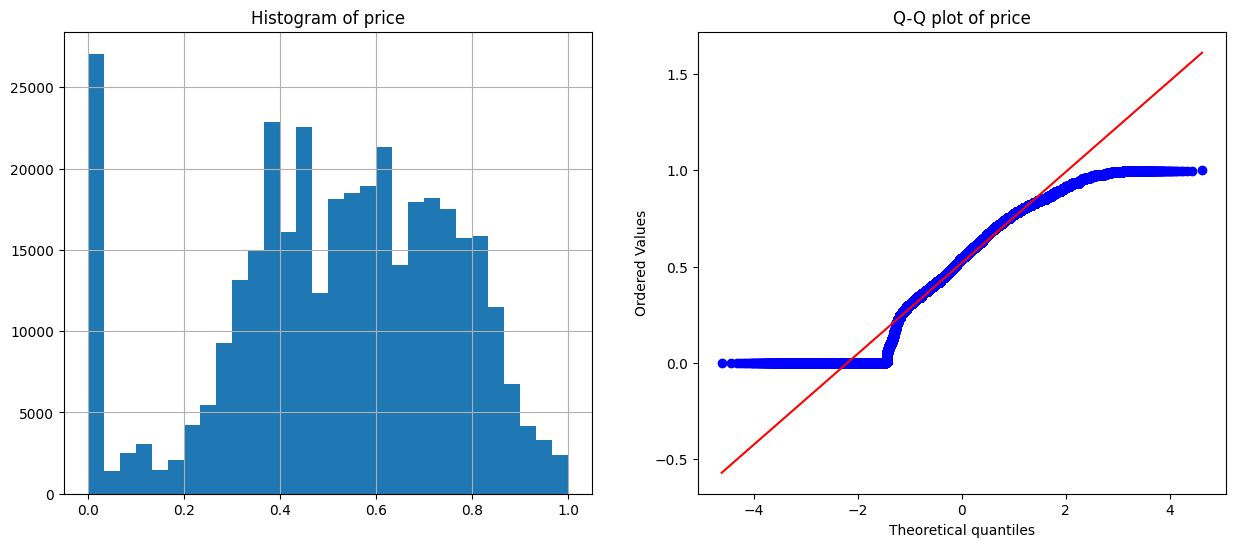

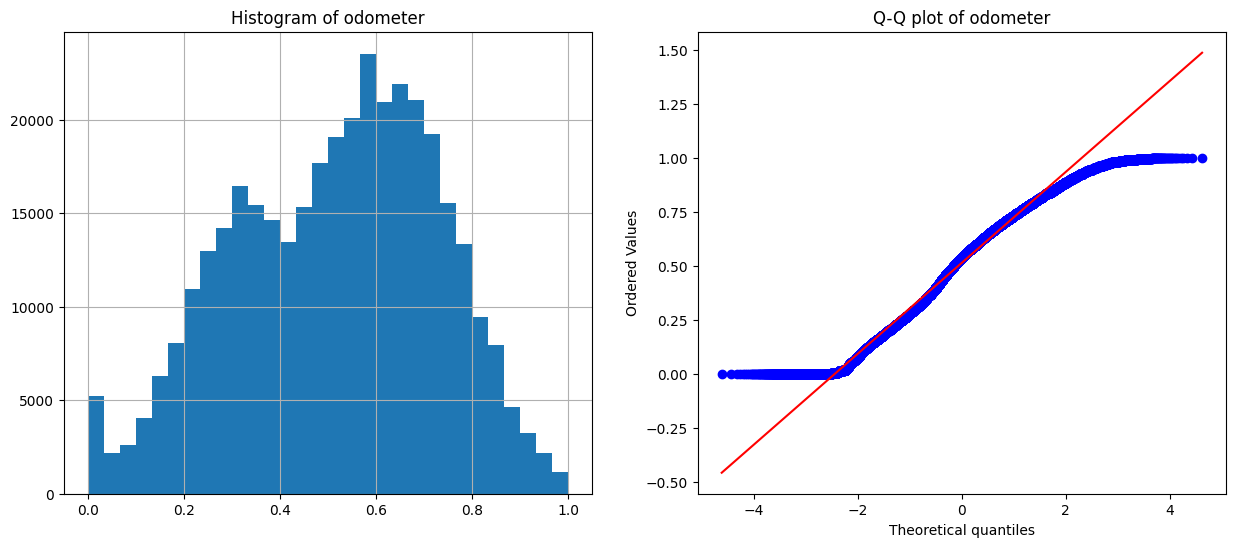

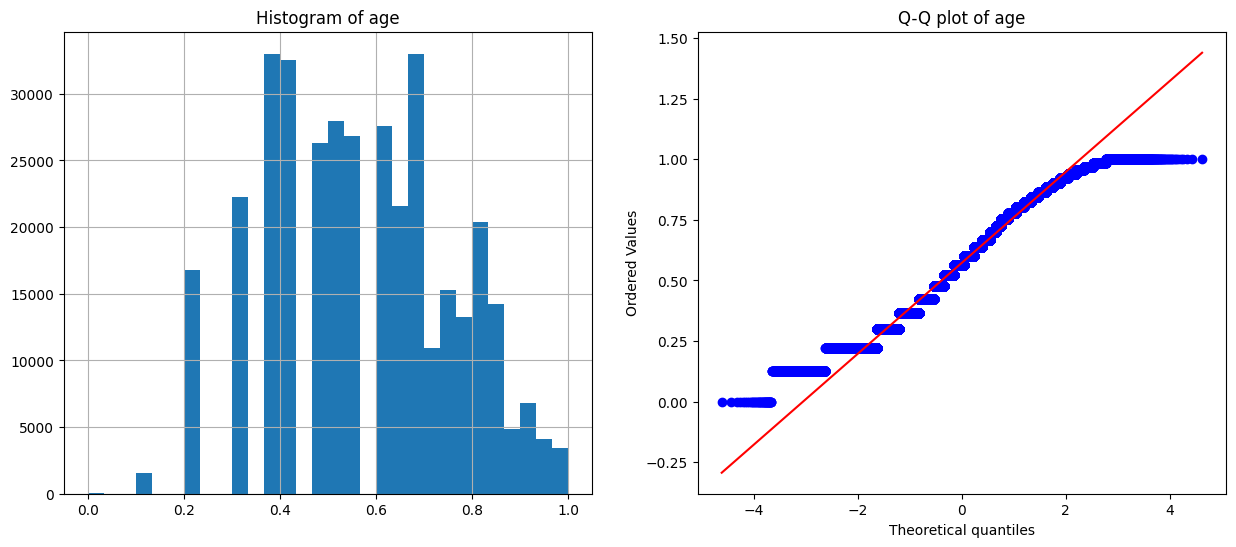

In [39]:
for i in ['price', 'odometer', 'age']:
    diagnostic_plots(minmax_df, i)

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [40]:
cars_df.describe(include='object').T

,count,unique,top,freq
region,362777,404,columbus,3015
region_url,362777,413,https://grandrapids.craigslist.org,2743
manufacturer,362777,40,ford,61190
model,362777,19265,f-150,7198
fuel,362777,5,gas,309295
title_status,362777,6,clean,351115
transmission,362777,3,automatic,288255
type,362777,13,sedan,153769
state,362777,51,ca,42325


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [41]:
def getCategoricalVariables(df):
    return df.select_dtypes(include='object').columns.tolist()

In [42]:
def classifyCardinalVariables(df, categoricalColumns):
    highly= []
    few = []
    for col in categoricalColumns:
        if len(df[col].unique()) >= 100:
            highly.append(col)
        else:
            few.append(col)

    print(f'Highly cardinal variables: {highly}')
    print(f'Few cardinal variables: {few}')
    return {'highly': highly, 'few': few}

In [43]:
categorical_variables = getCategoricalVariables(cars_df)
cardinal_variables = classifyCardinalVariables(cars_df, categorical_variables)
highly_cardinal_variables = cars_df.filter(cardinal_variables['highly'], axis=1)
few_cardinal_variables = cars_df.filter(cardinal_variables['few'], axis=1)

Highly cardinal variables: ['region', 'region_url', 'model']
Few cardinal variables: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


In [44]:
highly_cardinal_variables

,region,region_url,model
27,auburn,https://auburn.craigslist.org,sierra 1500 crew cab slt
28,auburn,https://auburn.craigslist.org,silverado 1500
29,auburn,https://auburn.craigslist.org,silverado 1500 crew
30,auburn,https://auburn.craigslist.org,tundra double cab sr
31,auburn,https://auburn.craigslist.org,f-150 xlt
...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,maxima s sedan 4d
426876,wyoming,https://wyoming.craigslist.org,s60 t5 momentum sedan 4d
426877,wyoming,https://wyoming.craigslist.org,xt4 sport suv 4d
426878,wyoming,https://wyoming.craigslist.org,es 350 sedan 4d


In [45]:
few_cardinal_variables

,manufacturer,fuel,title_status,transmission,type,state
27,gmc,gas,clean,other,pickup,al
28,chevrolet,gas,clean,other,pickup,al
29,chevrolet,gas,clean,other,pickup,al
30,toyota,gas,clean,other,pickup,al
31,ford,gas,clean,automatic,truck,al
...,...,...,...,...,...,...
426875,nissan,gas,clean,other,sedan,wy
426876,volvo,gas,clean,other,sedan,wy
426877,cadillac,diesel,clean,other,hatchback,wy
426878,lexus,gas,clean,other,sedan,wy


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

In [46]:
def graphCountplot(df, columns):
    plt.figure(figsize=(15,20))
    for i, col in enumerate(columns, 1):
        plt.subplot(int(round(len(columns)/2)),2, i)
        plt.xticks(rotation=90)
        sns.countplot(x=df[col])
    plt.tight_layout()

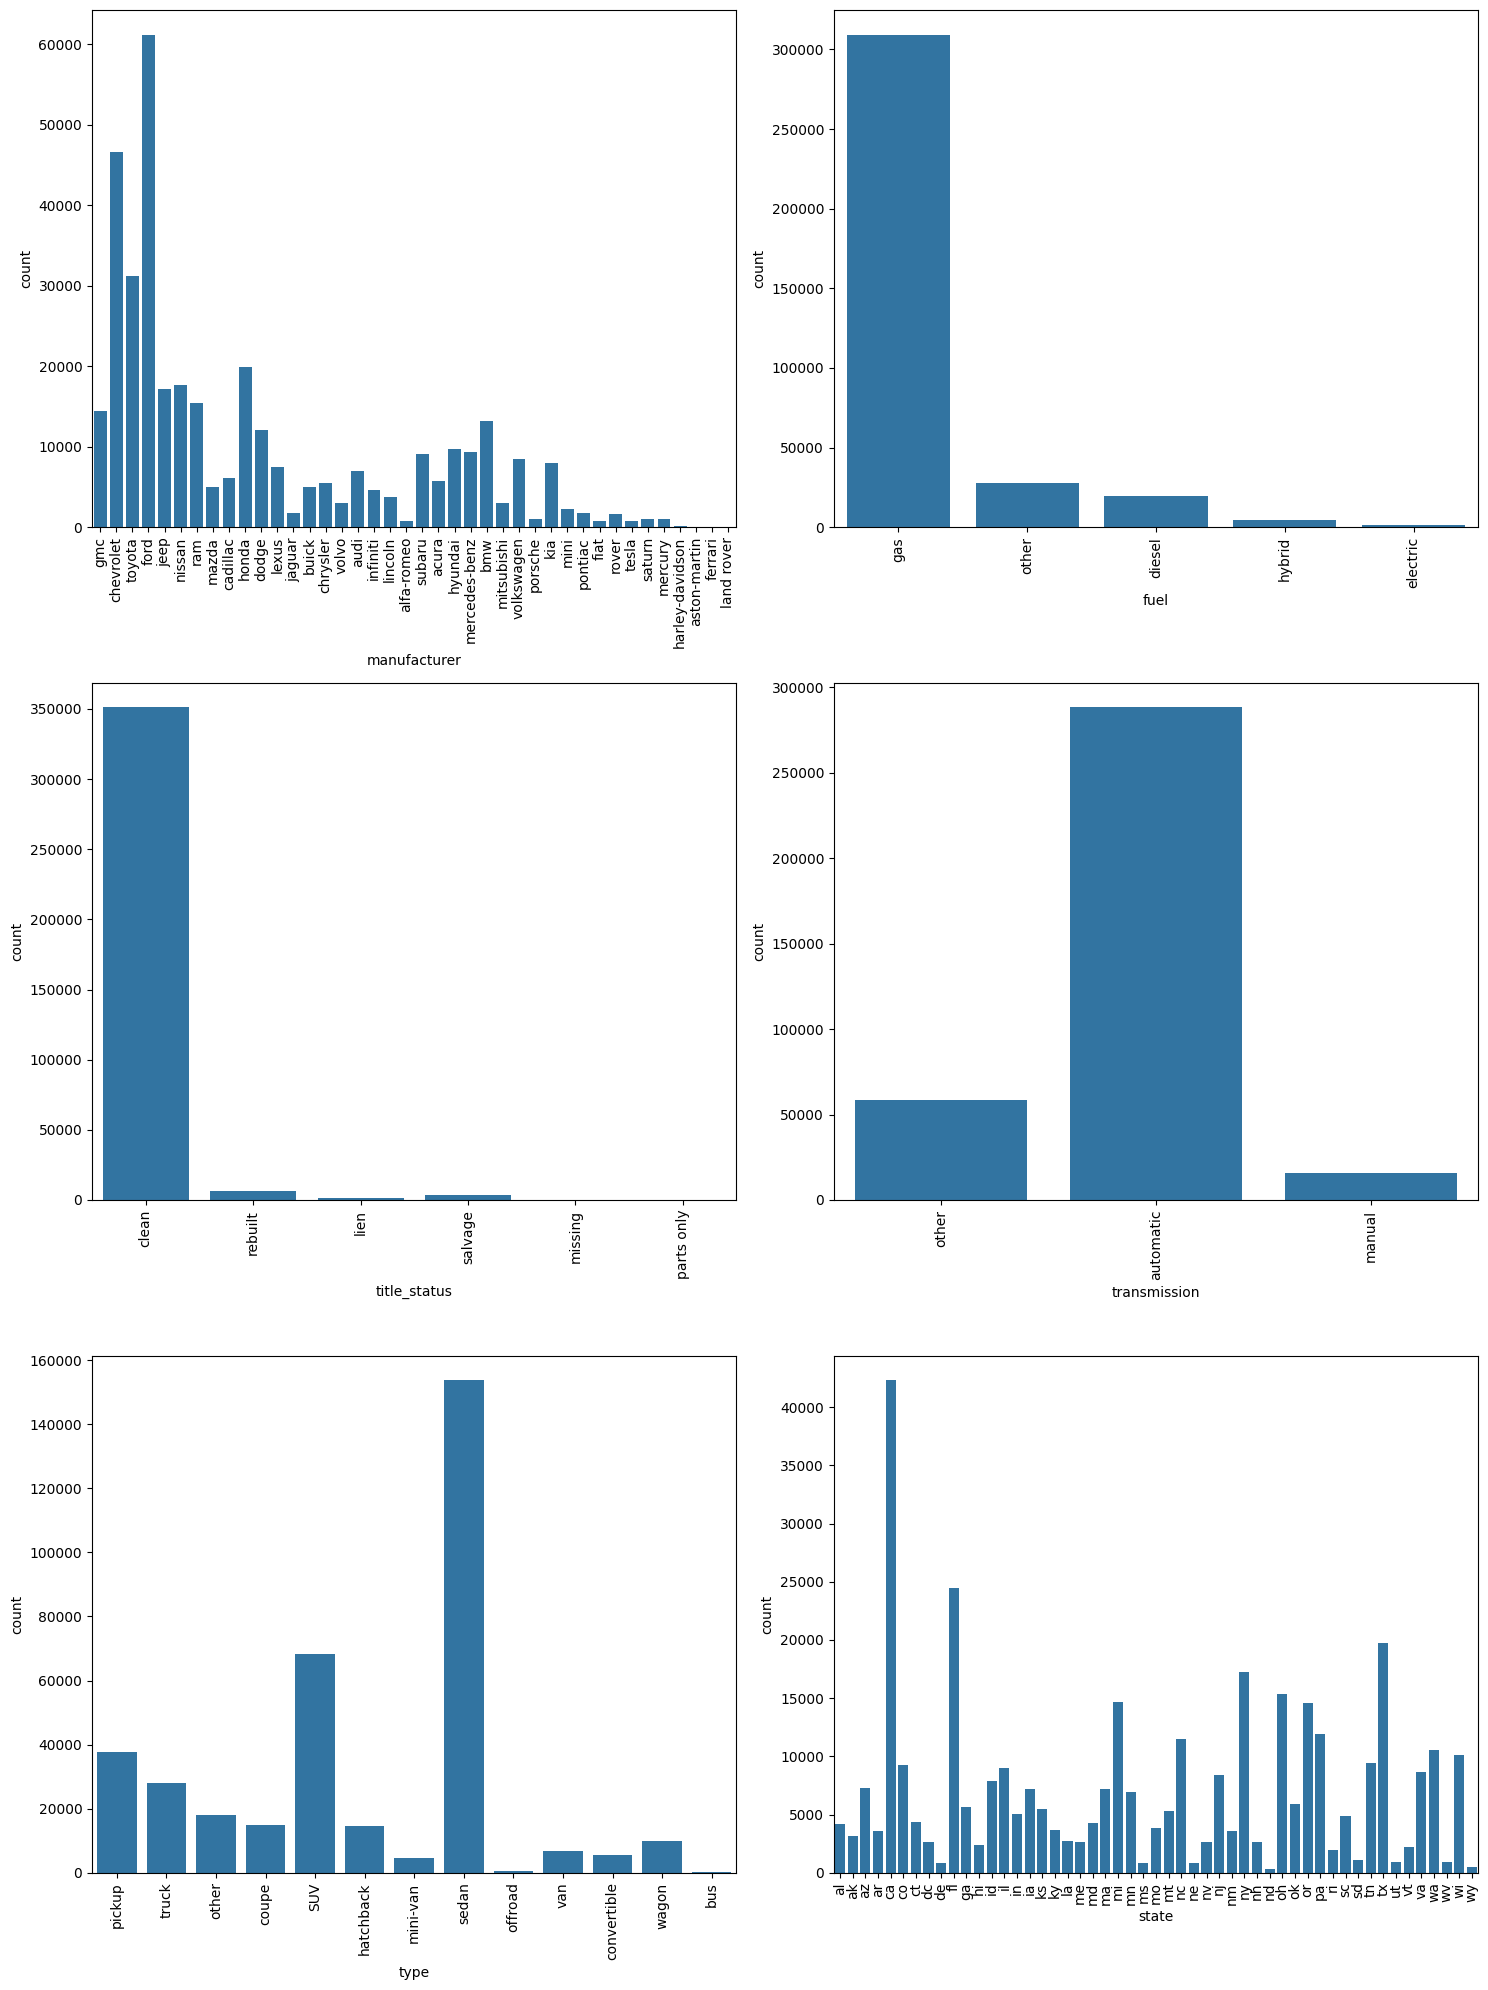

In [47]:
graphCountplot(few_cardinal_variables, cardinal_variables['few'])

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [48]:
from sklearn.preprocessing import OneHotEncoder
def encodeOneHot(df):
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_data = encoder.fit_transform(df)
    return pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [49]:
few_cardinal_variables = encodeOneHot(few_cardinal_variables)
few_cardinal_variables

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [50]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.1 MB/s eta 0:00:00


In [51]:
from category_encoders.binary import BinaryEncoder
def encodeBinary(df):
    encoder = BinaryEncoder()
    encoded_data = encoder.fit_transform(df)
    return pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

In [52]:
highly_cardinal_variables = encodeBinary(highly_cardinal_variables)
highly_cardinal_variables

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,0


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [53]:
minmax_df.reset_index(drop=True, inplace=True)
minmax_df

,price,odometer,age
0,0.788279,0.434239,0.563839
1,0.663623,0.484697,0.698600
2,0.846457,0.240991,0.221546
3,0.761222,0.361921,0.425539
4,0.555366,0.661793,0.601639
...,...,...,...
362772,0.676226,0.317882,0.300660
362773,0.756945,0.188010,0.221546
362774,0.802354,0.106726,0.221546
362775,0.739512,0.306606,0.367568


In [54]:
few_cardinal_variables.reset_index(drop=True, inplace=True)
few_cardinal_variables

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
highly_cardinal_variables.reset_index(drop=True, inplace=True)
highly_cardinal_variables

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,1
362773,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
362774,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
362775,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,0


In [56]:
conc_df = pd.concat([minmax_df, few_cardinal_variables, highly_cardinal_variables], axis=1)
conc_df

,price,odometer,age,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.788279,0.434239,0.563839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.663623,0.484697,0.698600,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.846457,0.240991,0.221546,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.761222,0.361921,0.425539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.555366,0.661793,0.601639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362772,0.676226,0.317882,0.300660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,1,1,1
362773,0.756945,0.188010,0.221546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
362774,0.802354,0.106726,0.221546,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
362775,0.739512,0.306606,0.367568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,0,1,1,1,1,0,0
